In [1]:
# tuning ridge regression parameter to find relationships between
# models.

In [10]:
from sklearn.datasets import make_regression
import numpy as np

In [11]:
reg_data, reg_target = make_regression(n_samples=100,
                                      n_features=2, effective_rank=1,
                                      noise=10)

In [12]:
reg_data[:5]

array([[ 0.11086758, -0.06135493],
       [ 0.09616934,  0.04829847],
       [ 0.1415751 , -0.114075  ],
       [-0.01817888, -0.068461  ],
       [ 0.09718498, -0.02389964]])

In [13]:
reg_target[:5]

array([  6.82101158,   4.73464556,  21.06897025,  -1.03948412,  10.4701602 ])

In [14]:
# Ridge Cross Validation is similar to Leave-One-Out Cross
# Validation (LOOCV)

In [15]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))

In [23]:
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [26]:
print 'best alpha is:'
rcv.alpha_

best alpha is:


0.10000000000000001

In [18]:
rcv2 = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))

In [19]:
rcv2.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.08,  0.09,  0.1 ,  0.11,  0.12]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [27]:
print 'best alpha is:'
rcv2.alpha_

best alpha is:


0.080000000000000002

In [28]:
# What does "best" mean?
# At each step in the CV process, the model scores an erro against
# the test sample. By default, it's a squared error.

In [29]:
alphas_to_test = np.linspace(0.01, 1)

In [31]:
alphas_to_test[:5]

array([ 0.01      ,  0.03020408,  0.05040816,  0.07061224,  0.09081633])

In [32]:
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)

In [33]:
rcv3.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.5151 ...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [34]:
rcv3.cv_values_.shape

(100, 50)

In [35]:
rcv3.alpha_

0.050408163265306123

In [39]:
smallest_idx = rcv3.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.050408163265306123

In [41]:
if rcv3.alpha_ == alphas_to_test[smallest_idx]:
    print 'Got it! Ridge CV found the correct smallest alpha:', rcv3.alpha_
else:
    print 'Something went wrong. Ridge Regression didnt find the smallest value'

Got it! Ridge CV found the correct smallest alpha: 0.0504081632653


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

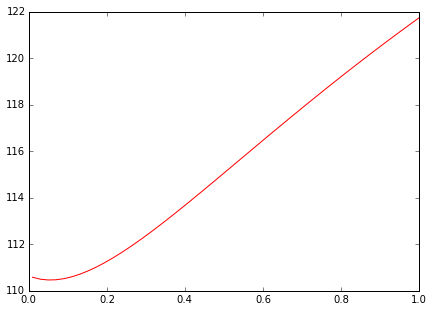

In [53]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)

# plot our results and look for the bottom of the trough
ax.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0), color='r')

In [54]:
# Creating our own scoring function
from msemad import MAD

In [55]:
from sklearn.metrics import make_scorer

In [56]:
MAD = make_scorer(MAD, greater_is_better=False)
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True,
              scoring=MAD)

In [57]:
rcv4.fit(reg_data, reg_target)

RidgeCV(alphas=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.5151 ...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=make_scorer(MAD, greater_is_better=False),
    store_cv_values=True)

In [60]:
smallest_idx = rcv4.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx] # this is wrong...

1.0

In [61]:
rcv4.alpha_ # this is correct

0.23224489795918368

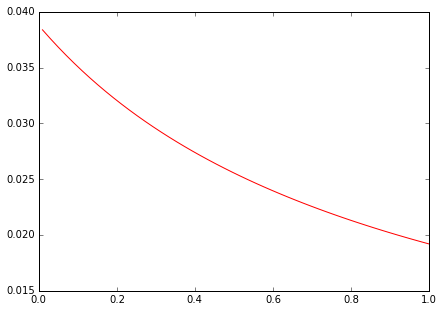

In [62]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)

# plot our results and look for the bottom of the trough
ax.plot(alphas_to_test, rcv4.cv_values_.mean(axis=0), color='r')